In [3]:
import os
import json
import datetime as dt
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas.plotting._converter as pandacnv
import numpy as np

from IPython.display import HTML

data_dir = os.path.join(os.getcwd(),'..','data')
data_file = "INCSTRAD_Microdati_Anno_2017.txt"
istat_comuni_file = "Elenco-comuni-italiani.csv"
config_file = "/media/d1/code/code-personal/python/Incidenti/src/config.json"

In [8]:
#
# File: JupyterNotebookWrapper.py
# Author(s): Ing. Giovanni Rizzardi - Summer 2019
# Project: DataScience
#

import os
import sys
import logging

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from src.logger_common import init_logger
from src.ClassIncidenti import Incidenti
from src.ClassAnagraficaComuni import AnagraficaComuni
from src.ClassSupportDecodeDataframes import SupportDecodeDataframes
from src.ClassIncidentsDataframeAggregator import IncidentsDataframeAggregator

config = None
with open(config_file) as fconfig:
    config = json.load(fconfig)

init_logger('/tmp', log_level=logging.FATAL, std_out_log_level=logging.FATAL)
    
base_dir = config['data_files']['data_path']
print(base_dir)
incidenti_fn = config['data_files']['file_incidenti']
incidenti_cols = config['data_structure']['columns']
cols_to_be_converted = config["data_structure"]["convert_to_number"]

anagrafica_comuni = AnagraficaComuni(file_comuni_anagrafica = os.path.join(data_dir, istat_comuni_file))
support_dataframes = SupportDecodeDataframes()

incidenti = Incidenti(file_incidenti = os.path.join(data_dir, incidenti_fn),
                      anagrafica_comuni = anagrafica_comuni,
                      support_dataframes = support_dataframes,
                      data_file_configurations=config["data_structure"])
incidenti.load_data_files()
aggregator = IncidentsDataframeAggregator(incidenti)

("Vers. Incidenti:", Incidenti.get_version(), 
 "Vers. Aggregator:", IncidentsDataframeAggregator.get_version(),
 "Numerosita' df:", incidenti.df_incidenti.shape[0])

../data/
2019-09-25 18:27:31,251 Incidenti INFO load_data_files >>
2019-09-25 18:27:31,251 Incidenti INFO load_data_files >>
2019-09-25 18:27:31,251 Incidenti INFO load_data_files >>
2019-09-25 18:27:31,251 Incidenti INFO load_data_files >>
2019-09-25 18:27:31,261 AnagraficaComuni INFO load_data_file >>
2019-09-25 18:27:31,261 AnagraficaComuni INFO load_data_file >>
2019-09-25 18:27:31,261 AnagraficaComuni INFO load_data_file >>
2019-09-25 18:27:31,261 AnagraficaComuni INFO load_data_file >>
2019-09-25 18:27:31,271 AnagraficaComuni DEBUG Data file to load: $/media/d1/code/code-personal/python/Incidenti/notebook/../data/Elenco-comuni-italiani.csv
2019-09-25 18:27:31,271 AnagraficaComuni DEBUG Data file to load: $/media/d1/code/code-personal/python/Incidenti/notebook/../data/Elenco-comuni-italiani.csv
2019-09-25 18:27:31,271 AnagraficaComuni DEBUG Data file to load: $/media/d1/code/code-personal/python/Incidenti/notebook/../data/Elenco-comuni-italiani.csv
2019-09-25 18:27:31,271 Anagrafi

2019-09-25 18:27:53,652 SupportDecodeDataframes DEBUG        descrizione
codice            
1          maschio
2          femmina
0         non dato
2019-09-25 18:27:53,652 SupportDecodeDataframes DEBUG        descrizione
codice            
1          maschio
2          femmina
0         non dato
2019-09-25 18:27:53,733 SupportDecodeDataframes DEBUG Types of genere_persona : descrizione    object
dtype: object
2019-09-25 18:27:53,733 SupportDecodeDataframes DEBUG Types of genere_persona : descrizione    object
dtype: object
2019-09-25 18:27:53,733 SupportDecodeDataframes DEBUG Types of genere_persona : descrizione    object
dtype: object
2019-09-25 18:27:53,733 SupportDecodeDataframes DEBUG Types of genere_persona : descrizione    object
dtype: object
2019-09-25 18:27:53,755 SupportDecodeDataframes INFO load_dataframes <<
2019-09-25 18:27:53,755 SupportDecodeDataframes INFO load_dataframes <<
2019-09-25 18:27:53,755 SupportDecodeDataframes INFO load_dataframes <<
2019-09-25 18:27:53,75

('Vers. Incidenti:',
 '00.00.05 alfa',
 'Vers. Aggregator:',
 '00.00.05 alfa',
 "Numerosita' df:",
 174436)

In [9]:
#incidenti.df_incidenti.dtypes
df_counted = incidenti.df_incidenti["veicolo__a___esito_conducente"].value_counts().to_frame("numero")
df_counted.reset_index(inplace=True)
df_counted.rename(columns={"index":'codice'}, inplace=True)
df_counted

,codice,numero
0,1,91914
1,2,80048
2,3,1264
3,0,976
4,4,234


,Numero
1,279
2,226
3,189
4,149
5,132
6,184
7,246
8,644
9,1093
10,925


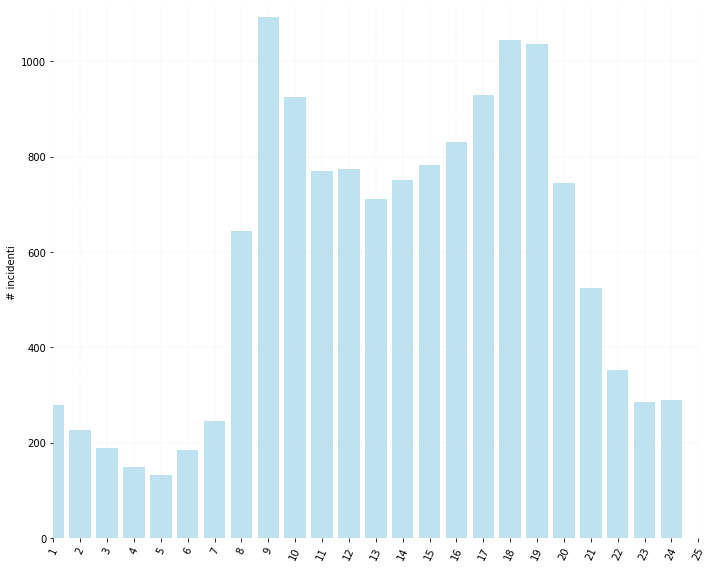

In [23]:
fig, ax = plt.subplots(figsize=(10, 8))

max_num = df_province['Numero'].max() + (df_province['Numero'].max() * 0.02)
width = 0.8
descriptions = df_province.index.to_list()
incidents_num = df_province['Numero'].values
idx = np.asarray([i for i in range(len(df_province['Numero'].values))])
rects = ax.bar(idx, incidents_num, width=width, color='#BEE2F0')
ax.set_xticks(idx)
ax.set_xticklabels(descriptions, rotation=65)
ax.set_ylabel('# incidenti')
ax.grid(False, color='#d4dadc', linestyle='-.', linewidth=0.2)
#ax.grid(True)
ax.set_xlim(0,24)
ax.set_ylim([0, max_num])
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

fig.tight_layout()


In [10]:
cols_feriti = ["veicolo__a___altri_passegg47","veicolo__a___altri_passegg48"]
cols_morti  = ["veicolo__a___altri_passegg49","veicolo__a___altri_passegg50"]
incidenti.df_incidenti["TotAltriFeriti"] = incidenti.df_incidenti[cols_feriti].sum(axis=1)
incidenti.df_incidenti["TotAltrimorti"] = incidenti.df_incidenti[cols_morti].sum(axis=1)
(incidenti.df_incidenti["TotAltriFeriti"].sum(),
incidenti.df_incidenti["TotAltriMorti"].sum())

In [11]:
df = aggregator.get_incidents_outcome_by_typology('nation_wide')
df.reset_index(inplace=True)
df

,index,natura_incidente,Incolumi,Feriti,Morti,codice,descrizione,Commento
0,0,1,7753,16972,468,1,Scontro frontale,Debbono essere coinvolti almeno due veicoli
1,1,2,52838,82511,619,2,Scontro frontale laterale,Debbono essere coinvolti almeno due veicoli
2,2,3,20864,26517,148,3,Scontro laterale,Debbono essere coinvolti almeno due veicoli
3,3,4,40197,51798,347,4,Tamponamento,Debbono essere coinvolti almeno due veicoli
4,4,5,17549,1456,14,5,Investimento di pedone,Deve essere coinvolto un solo veicolo
5,5,6,6270,7133,61,6,Urto con veicolo in momentanea fermata o arresto,Debbono essere coinvolti almeno due veicoli
6,6,7,173,2863,45,7,Urto con veicolo in sosta,Deve essere coinvolto un solo veicolo
7,7,8,577,9390,316,8,Urto con ostacolo accidentale,Deve essere coinvolto un solo veicolo
8,8,9,0,13,1,9,Urto con treno,Deve essere coinvolto un solo veicolo
9,9,10,900,18637,619,10,Fuoriuscita,Deve essere coinvolto un solo veicolo


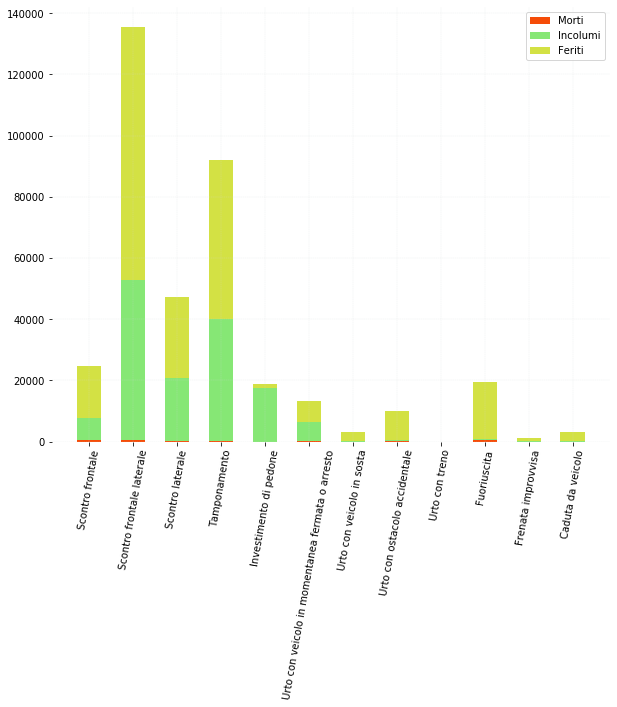

In [12]:
fig, ax = plt.subplots(figsize=(10, 8))

ind = np.arange(df.shape[0])
width = 0.55

color_incolumi = "#86e775"
color_feriti = "#d3e144"
color_morti = "#f54c08"


incolumi_df = np.array(df['Incolumi'])
feriti_df = np.array(df['Feriti'])
morti_df = np.array(df['Morti'])

p2 = ax.bar(ind,  morti_df,                         width=width, color=color_morti, label='Morti')
p1 = ax.bar(ind,  incolumi_df, bottom=morti_df,     width=width, color=color_incolumi, label='Incolumi')
p3 = ax.bar(ind,  feriti_df,   bottom=incolumi_df, width=width, color=color_feriti, label='Feriti')

ax.legend()
ax.set_xticks(ind)
ax.set_xticklabels(df['descrizione'].values, rotation=80)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.grid(False, color='#d4dadc', linestyle='-.', linewidth=0.2)

plt.show()

In [8]:
incidenti.get_count_of_incidents_by_typology('nation_wide')

,Numero,codice,descrizione,Commento
0,56595,2,Scontro frontale laterale,Debbono essere coinvolti almeno due veicoli
1,33358,4,Tamponamento,Debbono essere coinvolti almeno due veicoli
2,20700,3,Scontro laterale,Debbono essere coinvolti almeno due veicoli
3,19448,5,Investimento di pedone,Deve essere coinvolto un solo veicolo
4,15270,10,Fuoriuscita,Deve essere coinvolto un solo veicolo
5,9888,1,Scontro frontale,Debbono essere coinvolti almeno due veicoli
6,7713,8,Urto con ostacolo accidentale,Deve essere coinvolto un solo veicolo
7,5477,6,Urto con veicolo in momentanea fermata o arresto,Debbono essere coinvolti almeno due veicoli
8,2700,12,Caduta da veicolo,Deve essere coinvolto un solo veicolo
9,2473,7,Urto con veicolo in sosta,Deve essere coinvolto un solo veicolo


In [7]:
df.shape[0]

12